In [30]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns   
import matplotlib.pyplot as plt
import joblib
from pathlib import Path



In [31]:
df = pd.read_csv("heart_failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [32]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

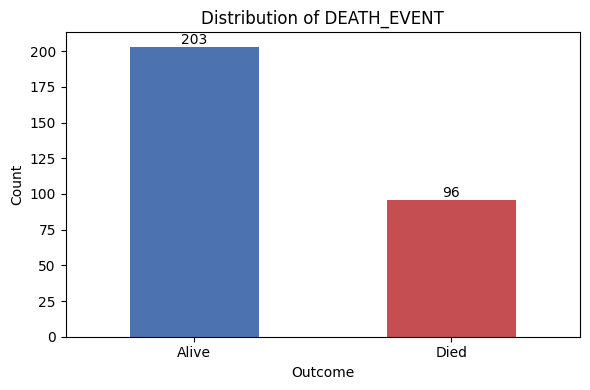

In [33]:
# Bar chart for DEATH_EVENT distribution
counts = df['DEATH_EVENT'].value_counts().sort_index()
counts.index = counts.index.map({0: 'Alive', 1: 'Died'})

ax = counts.plot(kind='bar', color=['#4c72b0', '#c44e52'], figsize=(6,4), rot=0)
ax.set_xlabel('Outcome')
ax.set_ylabel('Count')
ax.set_title('Distribution of DEATH_EVENT')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [34]:
# features and target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# train/test split (preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Train class counts:\n", y_train.value_counts())
print("Test class counts:\n", y_test.value_counts())

(239, 12) (60, 12) (239,) (60,)
Train class counts:
 DEATH_EVENT
0    162
1     77
Name: count, dtype: int64
Test class counts:
 DEATH_EVENT
0    41
1    19
Name: count, dtype: int64


In [35]:
scalar = StandardScaler()
x_train = scalar.fit_transform(X_train)
x_test = scalar.transform(X_test)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [36]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



In [37]:
print("confusion matrix:\n", confusion_matrix(y_test, y_pred)  )


confusion matrix:
 [[38  3]
 [ 7 12]]


In [38]:
import joblib
joblib.dump(model, 'Heart_model.pkl')
joblib.dump(scalar, 'scaler.pkl')


['scaler.pkl']